# Phoenix 2014 T Dataset Analysis

In [1]:
import glob
import os
import pandas as pd
from collections import Counter

from wordcloud import WordCloud
import numpy as np
from matplotlib import pyplot as plt


In [2]:
os.chdir("/new_home/xzj23/workspace/SLR")
os.getcwd()

'/new_home/xzj23/workspace/SLR'

In [3]:
data_dir = "./data/phoenix2014T"
features_dir = os.path.join(data_dir, "PHOENIX-2014-T/features/fullFrame-210x260px")
annotations_dir = os.path.join(data_dir, "PHOENIX-2014-T/annotations/manual")

## For Corpus

In [4]:
train_corpus = pd.read_csv(os.path.join(annotations_dir, "PHOENIX-2014-T.train.corpus.csv"), sep='|', header=0,
                           index_col='name')
train_complex_corpus = pd.read_csv(os.path.join(annotations_dir, "PHOENIX-2014-T.train-complex-annotation.corpus.csv"),
                                   sep='|', header=0, index_col='name')
dev_corpus = pd.read_csv(os.path.join(annotations_dir, "PHOENIX-2014-T.dev.corpus.csv"), sep='|', header=0,
                         index_col='name')
test_corpus = pd.read_csv(os.path.join(annotations_dir, "PHOENIX-2014-T.test.corpus.csv"), sep='|', header=0,
                          index_col='name')
all_corpus = pd.concat([train_corpus, dev_corpus, test_corpus])

In [5]:
train_corpus

video  \
name                                                                                   
11August_2010_Wednesday_tagesschau-1    11August_2010_Wednesday_tagesschau-1/1/*.png   
11August_2010_Wednesday_tagesschau-4    11August_2010_Wednesday_tagesschau-4/1/*.png   
11August_2010_Wednesday_tagesschau-5    11August_2010_Wednesday_tagesschau-5/1/*.png   
11August_2010_Wednesday_tagesschau-6    11August_2010_Wednesday_tagesschau-6/1/*.png   
11August_2010_Wednesday_tagesschau-7    11August_2010_Wednesday_tagesschau-7/1/*.png   
...                                                                              ...   
27January_2013_Sunday_tagesschau-8838  27January_2013_Sunday_tagesschau-8838/1/*.png   
27January_2013_Sunday_tagesschau-8839  27January_2013_Sunday_tagesschau-8839/1/*.png   
27January_2013_Sunday_tagesschau-8840  27January_2013_Sunday_tagesschau-8840/1/*.png   
27January_2013_Sunday_tagesschau-8841  27January_2013_Sunday_tagesschau-8841/1/*.png   
27January_2013_Sunday_tagesschau-8842  27January_2013_Sunday_tagesschau-8842/1/*.png   

                                       start  end   speaker  \
name                                                          
11August_2010_Wednesday_tagesschau-1      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-4      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-5      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-6      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-7      -1   -1  Signer08   
...                                      ...  ...       ...   
27January_2013_Sunday_tagesschau-8838     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8839     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8840     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8841     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8842     -1   -1  Signer01   

                                                                                    orth  \
name                                                                                       
11August_2010_Wednesday_tagesschau-1       JETZT WETTER MORGEN DONNERSTAG ZWOELF FEBRUAR   
11August_2010_Wednesday_tagesschau-4   ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG ...   
11August_2010_Wednesday_tagesschau-5   NORDWEST HEUTE NACHT TROCKEN BLEIBEN SUEDWEST ...   
11August_2010_Wednesday_tagesschau-6   TAGSUEBER OFT REGEN GEWITTER KOENNEN MANCHMAL ...   
11August_2010_Wednesday_tagesschau-7                        WOLKE LOCH SPEZIELL NORDWEST   
...                                                                                  ...   
27January_2013_Sunday_tagesschau-8838                   DIENSTAG WIND STARK REGEN KOMMEN   
27January_2013_Sunday_tagesschau-8839                           MITTWOCH WIND MEHR REGEN   
27January_2013_Sunday_tagesschau-8840                       SUED REGION SONNE AUCH DABEI   
27January_2013_Sunday_tagesschau-8841  DONNERSTAG FREUNDLICH SONNE DANN SPAETER KOMME...   
27January_2013_Sunday_tagesschau-8842                                       BLEIBEN WIND   

                                                                             translation  
name                                                                                      
11August_2010_Wednesday_tagesschau-1   und nun die wettervorhersage für morgen donner...  
11August_2010_Wednesday_tagesschau-4   mancherorts regnet es auch länger und ergiebig...  
11August_2010_Wednesday_tagesschau-5   im nordwesten bleibt es heute nacht meist troc...  
11August_2010_Wednesday_tagesschau-6   auch am tag gibt es verbreitet zum teil kräfti...  
11August_2010_Wednesday_tagesschau-7   größere wolkenlücken finden sich vor allem im ...  
...                                                                                  ...  
27January_2013_Sunday_tagesschau-8838  am dienstag wird es sehr windig und es regnet ...  
27January_2013_Sunday_tagesschau-8839  am mittwoch legt der wind noch zu und es regne...  
27Janua

In [6]:
train_complex_corpus

video  \
name                                                                                   
11August_2010_Wednesday_tagesschau-1    11August_2010_Wednesday_tagesschau-1/1/*.png   
11August_2010_Wednesday_tagesschau-4    11August_2010_Wednesday_tagesschau-4/1/*.png   
11August_2010_Wednesday_tagesschau-5    11August_2010_Wednesday_tagesschau-5/1/*.png   
11August_2010_Wednesday_tagesschau-6    11August_2010_Wednesday_tagesschau-6/1/*.png   
11August_2010_Wednesday_tagesschau-7    11August_2010_Wednesday_tagesschau-7/1/*.png   
...                                                                              ...   
27January_2013_Sunday_tagesschau-8838  27January_2013_Sunday_tagesschau-8838/1/*.png   
27January_2013_Sunday_tagesschau-8839  27January_2013_Sunday_tagesschau-8839/1/*.png   
27January_2013_Sunday_tagesschau-8840  27January_2013_Sunday_tagesschau-8840/1/*.png   
27January_2013_Sunday_tagesschau-8841  27January_2013_Sunday_tagesschau-8841/1/*.png   
27January_2013_Sunday_tagesschau-8842  27January_2013_Sunday_tagesschau-8842/1/*.png   

                                       start  end   speaker  \
name                                                          
11August_2010_Wednesday_tagesschau-1      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-4      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-5      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-6      -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-7      -1   -1  Signer08   
...                                      ...  ...       ...   
27January_2013_Sunday_tagesschau-8838     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8839     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8840     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8841     -1   -1  Signer01   
27January_2013_Sunday_tagesschau-8842     -1   -1  Signer01   

                                                                                    orth  \
name                                                                                       
11August_2010_Wednesday_tagesschau-1   __ON__ JETZT WETTER MORGEN DONNERSTAG ZWOELF F...   
11August_2010_Wednesday_tagesschau-4   ORT-PLUSPLUS REGEN DURCH REGEN-PLUSPLUS KOENNE...   
11August_2010_Wednesday_tagesschau-5   __ON__ loc-NORDWEST HEUTE NACHT TROCKEN BLEIBE...   
11August_2010_Wednesday_tagesschau-6   TAGSUEBER OFT REGEN-PLUSPLUS GEWITTER GEWITTER...   
11August_2010_Wednesday_tagesschau-7   __ON__ WOLKE LOCH LOCH SPEZIELL loc-NORDWEST _...   
...                                                                                  ...   
27January_2013_Sunday_tagesschau-8838  __ON__ DIENSTAG WIND STARK __HOLD__ REGEN __LE...   
27January_2013_Sunday_tagesschau-8839              MITTWOCH WIND MEHR REGEN REGEN __PU__   
27January_2013_Sunday_tagesschau-8840              SUED REGION __HOLD__ SONNE AUCH DABEI   
27January_2013_Sunday_tagesschau-8841  DONNERSTAG FREUNDLICH SONNE DANN SPAETER cl-KO...   
27January_2013_Sunday_tagesschau-8842                        __ON__ BLEIBEN WIND __OFF__   

                                                                             translation  
name                                                                                      
11August_2010_Wednesday_tagesschau-1   und nun die wettervorhersage für morgen donner...  
11August_2010_Wednesday_tagesschau-4   mancherorts regnet es auch länger und ergiebig...  
11August_2010_Wednesday_tagesschau-5   im nordwesten bleibt es heute nacht meist troc...  
11August_2010_Wednesday_tagesschau-6   auch am tag gibt es verbreitet zum teil kräfti...  
11August_2010_Wednesday_tagesschau-7   größere wolkenlücken finden sich vor allem im ...  
...                                                                                  ...  
27January_2013_Sunday_tagesschau-8838  am dienstag wird es sehr windig und es regnet ...  
27January_2013_Sunday_tagesschau-8839  am mittwoch legt der wind noch zu und es regne...  
27Janua

In [7]:
dev_corpus

video  \
name                                                                                       
11August_2010_Wednesday_tagesschau-2        11August_2010_Wednesday_tagesschau-2/1/*.png   
11August_2010_Wednesday_tagesschau-3        11August_2010_Wednesday_tagesschau-3/1/*.png   
11August_2010_Wednesday_tagesschau-8        11August_2010_Wednesday_tagesschau-8/1/*.png   
25October_2010_Monday_tagesschau-22          25October_2010_Monday_tagesschau-22/1/*.png   
05May_2011_Thursday_tagesschau-25              05May_2011_Thursday_tagesschau-25/1/*.png   
...                                                                                  ...   
06October_2012_Saturday_tagesschau-8729  06October_2012_Saturday_tagesschau-8729/1/*.png   
06October_2012_Saturday_tagesschau-8730  06October_2012_Saturday_tagesschau-8730/1/*.png   
06October_2012_Saturday_tagesschau-8744  06October_2012_Saturday_tagesschau-8744/1/*.png   
23March_2011_Wednesday_tagesschau-8751    23March_2011_Wednesday_tagesschau-8751/1/*.png   
27January_2013_Sunday_tagesschau-8836      27January_2013_Sunday_tagesschau-8836/1/*.png   

                                         start  end   speaker  \
name                                                            
11August_2010_Wednesday_tagesschau-2        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-3        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-8        -1   -1  Signer08   
25October_2010_Monday_tagesschau-22         -1   -1  Signer01   
05May_2011_Thursday_tagesschau-25           -1   -1  Signer08   
...                                        ...  ...       ...   
06October_2012_Saturday_tagesschau-8729     -1   -1  Signer08   
06October_2012_Saturday_tagesschau-8730     -1   -1  Signer08   
06October_2012_Saturday_tagesschau-8744     -1   -1  Signer08   
23March_2011_Wednesday_tagesschau-8751      -1   -1  Signer05   
27January_2013_Sunday_tagesschau-8836       -1   -1  Signer01   

                                                                                      orth  \
name                                                                                         
11August_2010_Wednesday_tagesschau-2                                     DRUCK TIEF KOMMEN   
11August_2010_Wednesday_tagesschau-3     ES-BEDEUTET VIEL WOLKE UND KOENNEN REGEN GEWIT...   
11August_2010_Wednesday_tagesschau-8     WIND MAESSIG SCHWACH REGION WENN GEWITTER WIND...   
25October_2010_Monday_tagesschau-22      MITTWOCH REGEN KOENNEN NORDWEST WAHRSCHEINLICH...   
05May_2011_Thursday_tagesschau-25        JETZT WETTER WIE-AUSSEHEN MORGEN FREITAG SECHS...   
...                                                                                    ...   
06October_2012_Saturday_tagesschau-8729  JETZT WETTER WIE-AUSSEHEN MORGEN SONNTAG SIEBT...   
06October_2012_Saturday_tagesschau-8730    MORGEN DEUTSCH LAND IX TIEF KOMMEN KUEHL KOMMEN   
06October_2012_Saturday_tagesschau-8744     MITTWOCH TEIL SONNE TEIL WOLKE BLEIBEN TROCKEN   
23March_2011_Wednesday_tagesschau-8751   NORDOST WIEDER WOLKE ABER SONST NUR BISSCHEN W...   
27January_2013_Sunday_tagesschau-8836    HEUTE NACHT PLUS DREI REGION NULL ZWISCHEN LEI...   

                                                                               translation  
name                                                                                        
11August_2010_Wednesday_tagesschau-2     tiefer luftdruck bestimmt in den nächsten tage...  
11August_2010_Wednesday_tagesschau-3     das bedeutet viele wolken und immer wieder zum...  
11August_2010_Wednesday_tagesschau-8     meist weht nur ein schwacher wind aus untersch...  
25October_2010_Monday_tagesschau-22      am mittwoch hier und da nieselregen in der nor...  
05May_2011_Thursday_tagesschau-25        und nun die wettervorhersage für morgen freita...  
...                                                                                    ...  
06October_2012_Saturday_tagesschau-8729  und nun die wettervorhersage für

In [8]:
test_corpus

video  \
name                                                                                       
25October_2010_Monday_tagesschau-17          25October_2010_Monday_tagesschau-17/1/*.png   
25October_2010_Monday_tagesschau-24          25October_2010_Monday_tagesschau-24/1/*.png   
15December_2010_Wednesday_tagesschau-37  15December_2010_Wednesday_tagesschau-37/1/*.png   
10March_2011_Thursday_heute-58                    10March_2011_Thursday_heute-58/1/*.png   
14August_2009_Friday_tagesschau-62            14August_2009_Friday_tagesschau-62/1/*.png   
...                                                                                  ...   
11September_2009_Friday_tagesschau-8780  11September_2009_Friday_tagesschau-8780/1/*.png   
11September_2009_Friday_tagesschau-8781  11September_2009_Friday_tagesschau-8781/1/*.png   
11September_2009_Friday_tagesschau-8782  11September_2009_Friday_tagesschau-8782/1/*.png   
01July_2010_Thursday_tagesschau-8797        01July_2010_Thursday_tagesschau-8797/1/*.png   
21August_2010_Saturday_tagesschau-8822    21August_2010_Saturday_tagesschau-8822/1/*.png   

                                         start  end   speaker  \
name                                                            
25October_2010_Monday_tagesschau-17         -1   -1  Signer01   
25October_2010_Monday_tagesschau-24         -1   -1  Signer01   
15December_2010_Wednesday_tagesschau-37     -1   -1  Signer05   
10March_2011_Thursday_heute-58              -1   -1  Signer01   
14August_2009_Friday_tagesschau-62          -1   -1  Signer05   
...                                        ...  ...       ...   
11September_2009_Friday_tagesschau-8780     -1   -1  Signer05   
11September_2009_Friday_tagesschau-8781     -1   -1  Signer05   
11September_2009_Friday_tagesschau-8782     -1   -1  Signer05   
01July_2010_Thursday_tagesschau-8797        -1   -1  Signer08   
21August_2010_Saturday_tagesschau-8822      -1   -1  Signer05   

                                                                                      orth  \
name                                                                                         
25October_2010_Monday_tagesschau-17      REGEN SCHNEE REGION VERSCHWINDEN NORD REGEN KO...   
25October_2010_Monday_tagesschau-24      DONNERSTAG NORDWEST REGEN REGION SONNE WOLKE W...   
15December_2010_Wednesday_tagesschau-37  KRAEFTIG AB MORGEN FRUEH MEISTENS SCHNEE SCHNE...   
10March_2011_Thursday_heute-58           WOCHENENDE SONNE SAMSTAG SCHOEN TEMPERATUR BIS...   
14August_2009_Friday_tagesschau-62       DEUTSCH LAND MORGEN HOCH DRUCK KOMMEN WOLKE AU...   
...                                                                                    ...   
11September_2009_Friday_tagesschau-8780                      SONST WECHSELHAFT SONNE WOLKE   
11September_2009_Friday_tagesschau-8781  WIND SCHWACH MAESSIG KUESTE MEER AUCH FRISCH W...   
11September_2009_Friday_tagesschau-8782               HEUTE NACHT VIERZEHN ZWISCHEN SIEBEN   
01July_2010_Thursday_tagesschau-8797      SONNTAG SPEZIELL REGION GEWITTER NORD MEHR SONNE   
21August_2010_Saturday_tagesschau-8822   HEUTE NACHT ZWISCHEN NEUNZEHN ZWISCHEN FUENFZE...   

                                                                               translation  
name                                                                                        
25October_2010_Monday_tagesschau-17      regen und schnee lassen an den alpen in der na...  
25October_2010_Monday_tagesschau-24      am donnerstag regen in der nordhälfte in der s...  
15December_2010_Wednesday_tagesschau-37  vom nordmeer zieht ein kräftiges tief heran un...  
10March_2011_Thursday_heute-58           sonnig geht es auch ins wochenende samstag ein...  
14August_2009_Friday_tagesschau-62       deutschland liegt morgen unter hochdruckeinflu...  
...                                                                                    ...  
11September_2009_Friday_tagesschau-8780             sonst ein wechsel aus

In [9]:
all_corpus

video  \
name                                                                                       
11August_2010_Wednesday_tagesschau-1        11August_2010_Wednesday_tagesschau-1/1/*.png   
11August_2010_Wednesday_tagesschau-4        11August_2010_Wednesday_tagesschau-4/1/*.png   
11August_2010_Wednesday_tagesschau-5        11August_2010_Wednesday_tagesschau-5/1/*.png   
11August_2010_Wednesday_tagesschau-6        11August_2010_Wednesday_tagesschau-6/1/*.png   
11August_2010_Wednesday_tagesschau-7        11August_2010_Wednesday_tagesschau-7/1/*.png   
...                                                                                  ...   
11September_2009_Friday_tagesschau-8780  11September_2009_Friday_tagesschau-8780/1/*.png   
11September_2009_Friday_tagesschau-8781  11September_2009_Friday_tagesschau-8781/1/*.png   
11September_2009_Friday_tagesschau-8782  11September_2009_Friday_tagesschau-8782/1/*.png   
01July_2010_Thursday_tagesschau-8797        01July_2010_Thursday_tagesschau-8797/1/*.png   
21August_2010_Saturday_tagesschau-8822    21August_2010_Saturday_tagesschau-8822/1/*.png   

                                         start  end   speaker  \
name                                                            
11August_2010_Wednesday_tagesschau-1        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-4        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-5        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-6        -1   -1  Signer08   
11August_2010_Wednesday_tagesschau-7        -1   -1  Signer08   
...                                        ...  ...       ...   
11September_2009_Friday_tagesschau-8780     -1   -1  Signer05   
11September_2009_Friday_tagesschau-8781     -1   -1  Signer05   
11September_2009_Friday_tagesschau-8782     -1   -1  Signer05   
01July_2010_Thursday_tagesschau-8797        -1   -1  Signer08   
21August_2010_Saturday_tagesschau-8822      -1   -1  Signer05   

                                                                                      orth  \
name                                                                                         
11August_2010_Wednesday_tagesschau-1         JETZT WETTER MORGEN DONNERSTAG ZWOELF FEBRUAR   
11August_2010_Wednesday_tagesschau-4     ORT REGEN DURCH REGEN KOENNEN UEBERSCHWEMMUNG ...   
11August_2010_Wednesday_tagesschau-5     NORDWEST HEUTE NACHT TROCKEN BLEIBEN SUEDWEST ...   
11August_2010_Wednesday_tagesschau-6     TAGSUEBER OFT REGEN GEWITTER KOENNEN MANCHMAL ...   
11August_2010_Wednesday_tagesschau-7                          WOLKE LOCH SPEZIELL NORDWEST   
...                                                                                    ...   
11September_2009_Friday_tagesschau-8780                      SONST WECHSELHAFT SONNE WOLKE   
11September_2009_Friday_tagesschau-8781  WIND SCHWACH MAESSIG KUESTE MEER AUCH FRISCH W...   
11September_2009_Friday_tagesschau-8782               HEUTE NACHT VIERZEHN ZWISCHEN SIEBEN   
01July_2010_Thursday_tagesschau-8797      SONNTAG SPEZIELL REGION GEWITTER NORD MEHR SONNE   
21August_2010_Saturday_tagesschau-8822   HEUTE NACHT ZWISCHEN NEUNZEHN ZWISCHEN FUENFZE...   

                                                                               translation  
name                                                                                        
11August_2010_Wednesday_tagesschau-1     und nun die wettervorhersage für morgen donner...  
11August_2010_Wednesday_tagesschau-4     mancherorts regnet es auch länger und ergiebig...  
11August_2010_Wednesday_tagesschau-5     im nordwesten bleibt es heute nacht meist troc...  
11August_2010_Wednesday_tagesschau-6     auch am tag gibt es verbreitet zum teil kräfti...  
11August_2010_Wednesday_tagesschau-7     größere wolkenlücken finden sich vor allem im ...  
...                                                                                    ...  
11September_2009_Friday_tagesschau-8780             sonst ein wechsel aus

{'Train Set Size': 7096, 'Dev Set Size': 519, 'Test Set Size': 642, 'Train Complex Size': 7096, 'All Set Size': 8257}


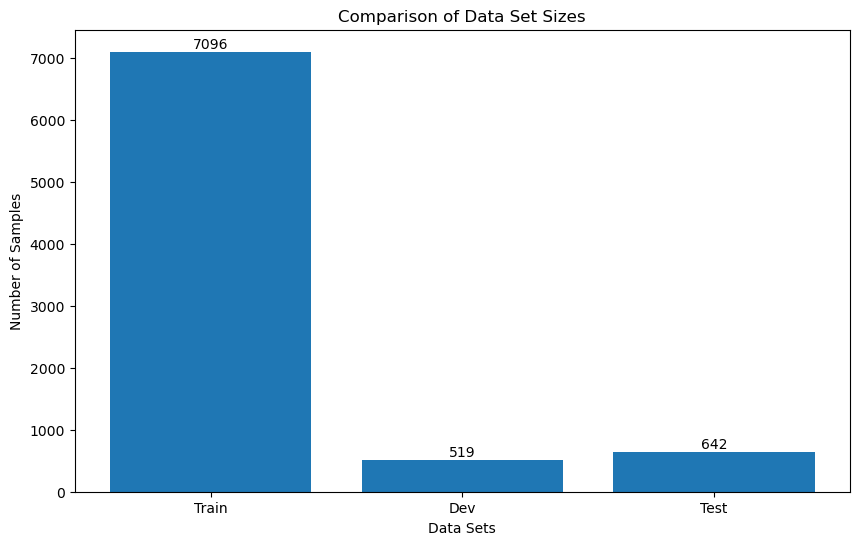

In [10]:
print({"Train Set Size": train_corpus.__len__(), "Dev Set Size": dev_corpus.__len__(),
       "Test Set Size": test_corpus.__len__(), "Train Complex Size": train_complex_corpus.__len__(),
       "All Set Size": all_corpus.__len__()})
# 设置绘图参数
plt.figure(figsize=(10, 6))

# 绘制直方图
labels = ['Train', 'Dev', 'Test']
sizes = [train_corpus.__len__(), dev_corpus.__len__(), test_corpus.__len__()]

# 创建直方图
plt.bar(labels, sizes)

# 添加标题和标签
plt.title('Comparison of Data Set Sizes')
plt.xlabel('Data Sets')
plt.ylabel('Number of Samples')

# 显示数值
for i, v in enumerate(sizes):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# 显示图形
plt.show()


## For Orth

In [11]:
def plot_word_frequencies(word_counts, title):
    words, counts = zip(*word_counts.most_common(20))
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    # 显示数值
    for i, v in enumerate(counts):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')
    plt.show()

In [12]:
def generate_word_cloud(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

Counter({'REGEN': 2149, 'REGION': 1883, 'IX': 1505, 'KOMMEN': 1324, 'MORGEN': 1263, 'NORD': 1216, 'SONNE': 1140, 'WOLKE': 1107, 'GRAD': 1049, 'NACHT': 860, 'SUED': 835, 'KOENNEN': 814, 'SCHNEE': 767, 'AUCH': 762, 'MEHR': 752, 'BISSCHEN': 751, 'HEUTE': 736, 'BIS': 685, 'GEWITTER': 672, 'WETTER': 669, 'WIND': 637, 'WEHEN': 581, 'ZWANZIG': 536, 'OST': 532, 'DANN': 520, 'WEST': 486, 'SCHAUER': 477, 'MOEGLICH': 433, 'ABEND': 427, 'FREUNDLICH': 418, 'NEBEL': 416, 'BERG': 414, 'NORDWEST': 408, 'JETZT': 404, 'ABER': 386, 'STURM': 385, 'TAG': 362, 'TEIL': 348, 'WIE-AUSSEHEN': 341, 'TIEF': 328, 'FLUSS': 320, 'MINUS': 320, 'SUEDOST': 314, 'MITTE': 309, 'WECHSELHAFT': 303, 'KLAR': 297, 'SONNTAG': 295, 'SCHWACH': 294, 'KUEHL': 291, 'FREITAG': 290, 'VIEL': 288, 'TROCKEN': 285, 'SAMSTAG': 280, 'STARK': 274, 'HOCH': 274, 'MAESSIG': 270, 'BESONDERS': 269, 'DONNERSTAG': 262, 'SONST': 261, 'MEISTENS': 253, 'IN-KOMMEND': 247, 'BLEIBEN': 243, 'UND': 240, 'KALT': 239, 'MITTWOCH': 232, 'MONTAG': 225, 'LAND':

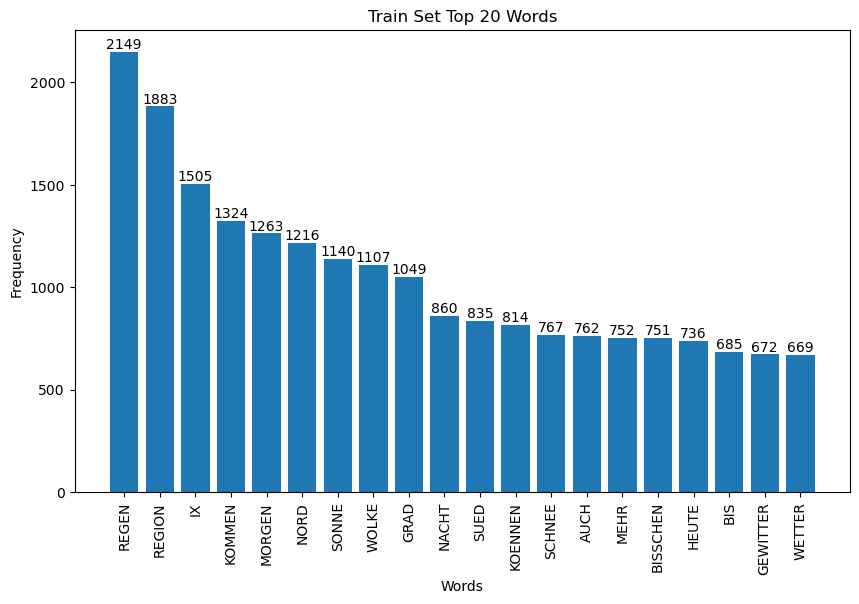

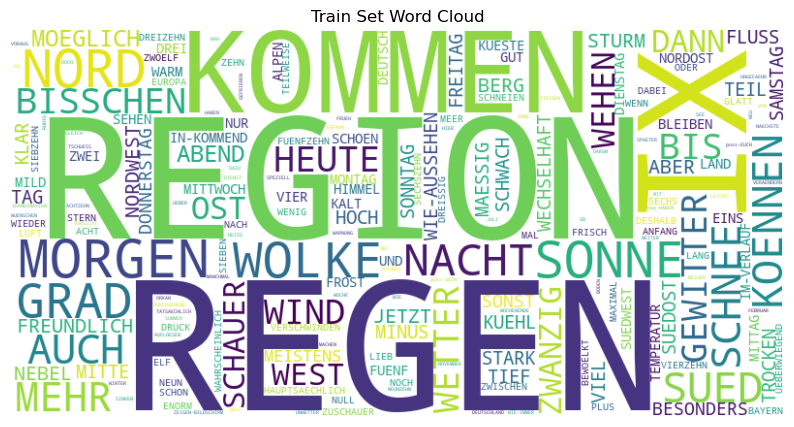

In [13]:
# train set
train_orth = train_corpus.orth.tolist()
train_word_counts = Counter(sum([a.split() for a in train_orth], []))
print(train_word_counts)
plot_word_frequencies(train_word_counts, "Train Set Top 20 Words")
generate_word_cloud(train_word_counts, "Train Set Word Cloud")

Counter({'REGEN': 3369, '__OFF__': 2753, '__ON__': 2560, 'IX': 1422, 'MORGEN': 1318, 'WOLKE': 1232, 'SONNE': 1201, 'GRAD': 1123, 'REGION': 992, 'WEHEN': 961, 'loc-REGION': 933, '__PU__': 897, 'SCHNEE': 892, 'NACHT': 861, 'GEWITTER': 823, 'KOENNEN': 818, 'MEHR': 796, 'AUCH': 763, 'BISSCHEN': 757, 'cl-KOMMEN': 752, 'SCHAUER': 747, 'HEUTE': 742, 'KOMMEN': 737, 'BIS': 686, 'SUED': 686, '__HOLD__': 679, 'WIND': 676, 'NORD': 673, 'WETTER': 671, 'ZWANZIG': 536, 'DANN': 520, 'NEBEL': 465, 'OST': 464, 'MOEGLICH': 445, '__LEFTHAND__': 442, 'ABEND': 427, 'FREUNDLICH': 424, 'BERG': 420, 'STURM': 416, 'JETZT': 405, 'TEIL': 405, 'ABER': 387, 'MAESSIG': 375, 'WEST': 369, 'TAG': 367, 'WECHSELHAFT': 360, 'FLUSS': 346, 'TIEF': 329, 'MINUS': 323, 'WIE-AUSSEHEN': 320, 'SCHWACH': 314, 'NORDRAUM': 312, 'MITTE': 312, '__EMP__': 304, 'BLEIBEN': 299, 'KLAR': 299, 'SONNTAG': 297, 'KUEHL': 295, 'FREITAG': 291, 'TROCKEN': 289, 'VIEL': 289, 'SAMSTAG': 280, 'STARK': 279, 'HOCH': 279, 'BESONDERS': 270, 'loc-NORD': 2

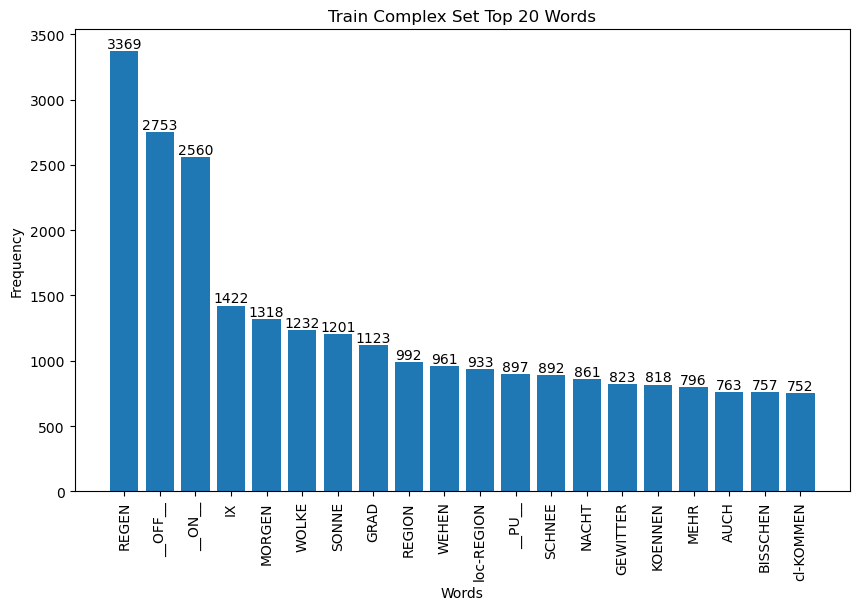

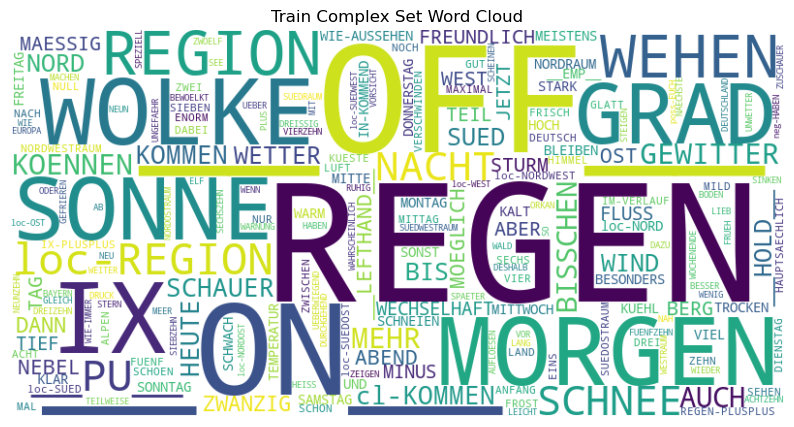

In [14]:
# train_complex set
train_complex_orth = train_complex_corpus.orth.tolist()
train_complex_word_counts = Counter(sum([a.split() for a in train_complex_orth], []))
print(train_complex_word_counts)
plot_word_frequencies(train_complex_word_counts, "Train Complex Set Top 20 Words")
generate_word_cloud(train_complex_word_counts, "Train Complex Set Word Cloud")

Counter({'REGEN': 128, 'REGION': 124, 'MORGEN': 109, 'IX': 97, 'GRAD': 92, 'NORD': 88, 'KOMMEN': 74, 'SONNE': 71, 'WOLKE': 66, 'SCHNEE': 61, 'WETTER': 60, 'KOENNEN': 59, 'NACHT': 57, 'AUCH': 48, 'SUED': 48, 'WIND': 46, 'BIS': 46, 'MEHR': 45, 'BISSCHEN': 44, 'ZWANZIG': 43, 'GEWITTER': 41, 'DANN': 40, 'HEUTE': 39, 'JETZT': 35, 'WEST': 34, 'WIE-AUSSEHEN': 33, 'SCHAUER': 33, 'WEHEN': 32, 'OST': 32, 'ABEND': 31, 'TAG': 31, 'MINUS': 30, 'FREUNDLICH': 30, 'MOEGLICH': 29, 'STURM': 29, 'BERG': 28, 'FLUSS': 28, 'HOCH': 25, 'SONNTAG': 25, 'NEBEL': 24, 'ABER': 24, 'TEIL': 23, 'STARK': 22, 'WARM': 22, 'KUEHL': 22, 'SUEDOST': 22, 'TROCKEN': 22, 'TIEF': 21, 'MAESSIG': 21, 'SUEDWEST': 21, 'SCHWACH': 20, 'NORDWEST': 20, 'MITTE': 20, 'BLEIBEN': 20, 'FREITAG': 19, 'WECHSELHAFT': 19, 'UND': 18, 'MITTWOCH': 18, 'SECHS': 18, 'EINS': 18, 'SAMSTAG': 17, 'DREI': 17, 'TEMPERATUR': 17, 'NORDOST': 17, 'VIEL': 16, 'IM-VERLAUF': 16, 'IN-KOMMEND': 16, 'GUT': 16, 'FUENF': 15, 'VIER': 15, 'LUFT': 15, 'MONTAG': 15, 'DE

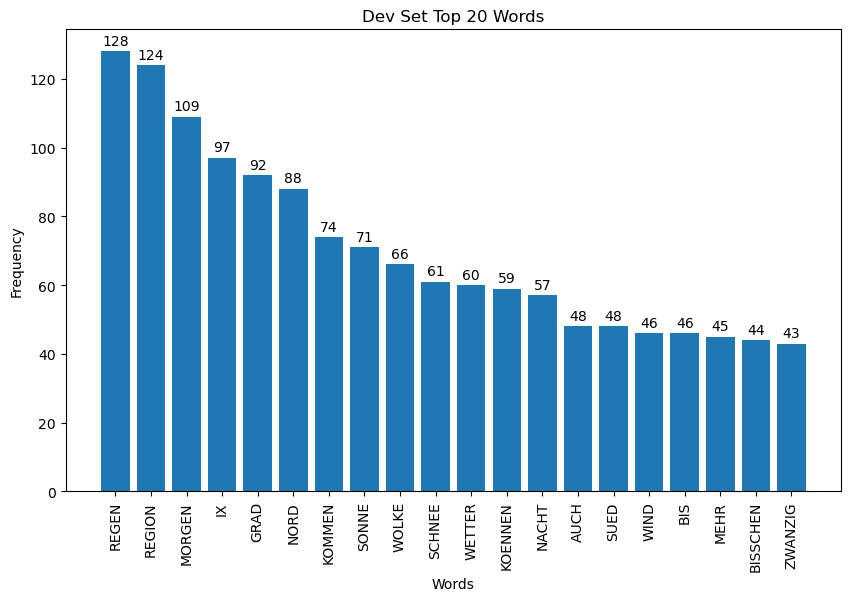

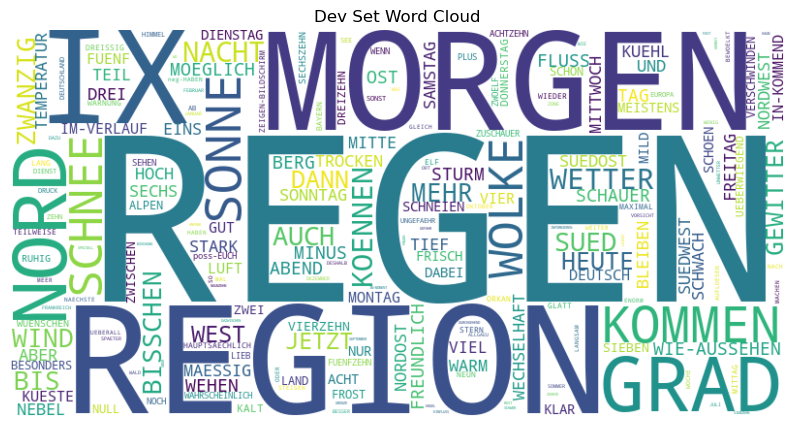

In [15]:
# dev set
dev_orth = dev_corpus.orth.tolist()
dev_word_counts = Counter(sum([a.split() for a in dev_orth], []))
print(dev_word_counts)
plot_word_frequencies(dev_word_counts, "Dev Set Top 20 Words")
generate_word_cloud(dev_word_counts, "Dev Set Word Cloud")

Counter({'REGEN': 157, 'REGION': 150, 'MORGEN': 122, 'IX': 116, 'WOLKE': 95, 'NORD': 94, 'KOMMEN': 85, 'SONNE': 83, 'GRAD': 77, 'WETTER': 72, 'GEWITTER': 66, 'SUED': 66, 'NACHT': 65, 'SCHNEE': 60, 'KOENNEN': 60, 'HEUTE': 60, 'AUCH': 59, 'WIND': 59, 'MEHR': 53, 'ZWANZIG': 45, 'BISSCHEN': 43, 'WEHEN': 43, 'SCHAUER': 40, 'OST': 39, 'FREUNDLICH': 38, 'BIS': 37, 'ABEND': 37, 'WECHSELHAFT': 36, 'WIE-AUSSEHEN': 36, 'NORDWEST': 35, 'DANN': 34, 'NEBEL': 33, 'JETZT': 33, 'SAMSTAG': 32, 'MOEGLICH': 31, 'WEST': 30, 'SCHWACH': 29, 'SONNTAG': 28, 'ABER': 28, 'SUEDOST': 28, 'DONNERSTAG': 26, 'STARK': 26, 'SONST': 25, 'STURM': 25, 'BERG': 25, 'FLUSS': 25, 'TIEF': 25, 'FREITAG': 24, 'VIEL': 24, 'TROCKEN': 24, 'KUEHL': 23, 'BESONDERS': 23, 'DEUTSCH': 22, 'GUT': 22, 'IN-KOMMEND': 21, 'WARM': 21, 'BLEIBEN': 20, 'TAG': 20, 'MONTAG': 20, 'LAND': 19, 'HOCH': 19, 'TEIL': 19, 'DIENSTAG': 18, 'NORDOST': 18, 'MAESSIG': 18, 'KALT': 17, 'TEMPERATUR': 17, 'IM-VERLAUF': 17, 'MEISTENS': 16, 'MINUS': 16, 'MITTWOCH': 1

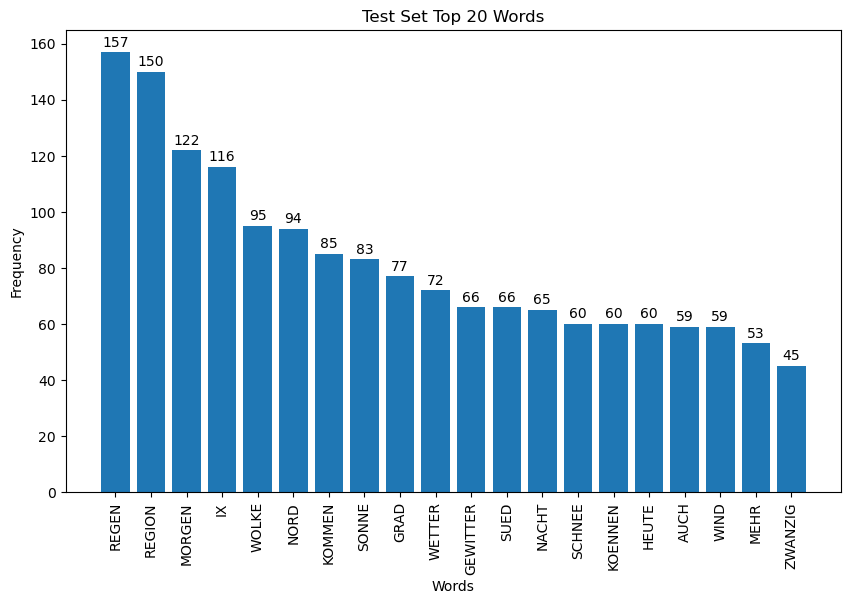

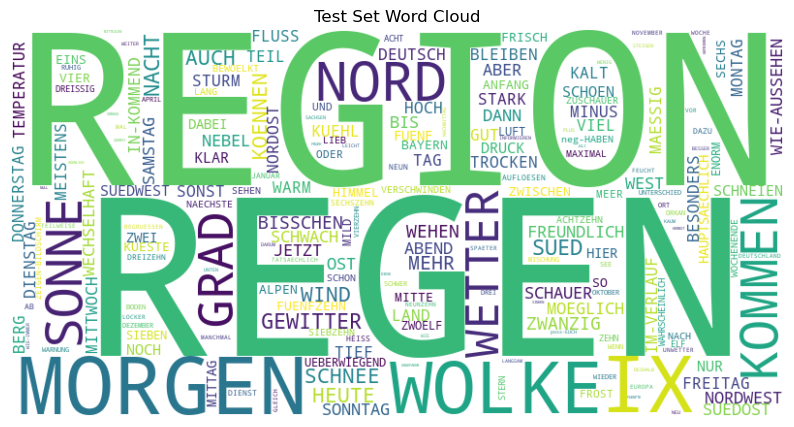

In [16]:
# test set
test_orth = test_corpus.orth.tolist()
test_word_counts = Counter(sum([a.split() for a in test_orth], []))
print(test_word_counts)
plot_word_frequencies(test_word_counts, "Test Set Top 20 Words")
generate_word_cloud(test_word_counts, "Test Set Word Cloud")

Counter({'REGEN': 2434, 'REGION': 2157, 'IX': 1718, 'MORGEN': 1494, 'KOMMEN': 1483, 'NORD': 1398, 'SONNE': 1294, 'WOLKE': 1268, 'GRAD': 1218, 'NACHT': 982, 'SUED': 949, 'KOENNEN': 933, 'SCHNEE': 888, 'AUCH': 869, 'MEHR': 850, 'BISSCHEN': 838, 'HEUTE': 835, 'WETTER': 801, 'GEWITTER': 779, 'BIS': 768, 'WIND': 742, 'WEHEN': 656, 'ZWANZIG': 624, 'OST': 603, 'DANN': 594, 'SCHAUER': 550, 'WEST': 550, 'ABEND': 495, 'MOEGLICH': 493, 'FREUNDLICH': 486, 'NEBEL': 473, 'JETZT': 472, 'BERG': 467, 'NORDWEST': 463, 'STURM': 439, 'ABER': 438, 'TAG': 413, 'WIE-AUSSEHEN': 410, 'TEIL': 390, 'TIEF': 374, 'FLUSS': 373, 'MINUS': 366, 'SUEDOST': 364, 'WECHSELHAFT': 358, 'SONNTAG': 348, 'SCHWACH': 343, 'MITTE': 341, 'KUEHL': 336, 'FREITAG': 333, 'TROCKEN': 331, 'SAMSTAG': 329, 'VIEL': 328, 'KLAR': 326, 'STARK': 322, 'HOCH': 318, 'MAESSIG': 309, 'BESONDERS': 303, 'DONNERSTAG': 298, 'SONST': 292, 'IN-KOMMEND': 284, 'BLEIBEN': 283, 'MEISTENS': 283, 'UND': 268, 'KALT': 266, 'MITTWOCH': 266, 'WARM': 264, 'MONTAG':

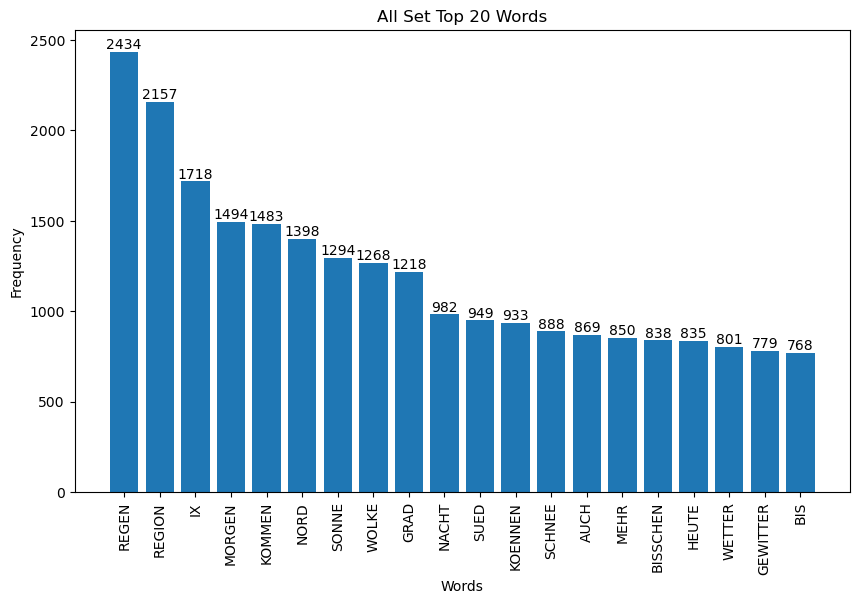

In [17]:
# all set
all_orth = all_corpus.orth.tolist()
all_word_counts = Counter(sum([a.split() for a in all_orth], []))
print(all_word_counts)
plot_word_frequencies(all_word_counts, "All Set Top 20 Words")
generate_word_cloud(all_word_counts, "All Set Word Cloud")

## For Translation

Counter({'und': 4156, 'im': 2934, 'es': 2852, 'der': 2462, 'am': 2197, 'in': 1938, 'die': 1865, 'auch': 1747, 'grad': 1588, 'bis': 1526, 'den': 1429, 'morgen': 1292, 'nacht': 1042, 'noch': 974, 'an': 962, 'heute': 838, 'regen': 838, 'sich': 825, 'wolken': 823, 'ein': 747, 'süden': 742, 'sonne': 740, 'norden': 737, 'ist': 722, 'wird': 709, 'für': 661, 'das': 649, 'schauer': 606, 'mit': 604, 'von': 582, 'westen': 579, 'aber': 579, 'dann': 573, 'sonst': 546, 'tag': 498, 'wind': 489, 'da': 484, 'osten': 483, 'wieder': 474, 'auf': 465, 'mal': 461, 'über': 460, 'teilweise': 454, 'gewitter': 453, 'aus': 439, 'vor': 436, 'zum': 416, 'oder': 403, 'nur': 395, 'wettervorhersage': 390, 'nun': 387, 'schnee': 385, 'etwas': 385, 'hier': 370, 'meist': 367, 'wetter': 361, 'abend': 359, 'regnet': 352, 'gibt': 348, 'nordwesten': 343, 'uns': 334, 'bleibt': 331, 'allem': 315, 'nach': 311, 'minus': 306, 'zu': 301, 'bei': 296, 'freitag': 287, 'sind': 286, 'teil': 282, 'richtung': 279, 'weht': 269, 'dabei': 2

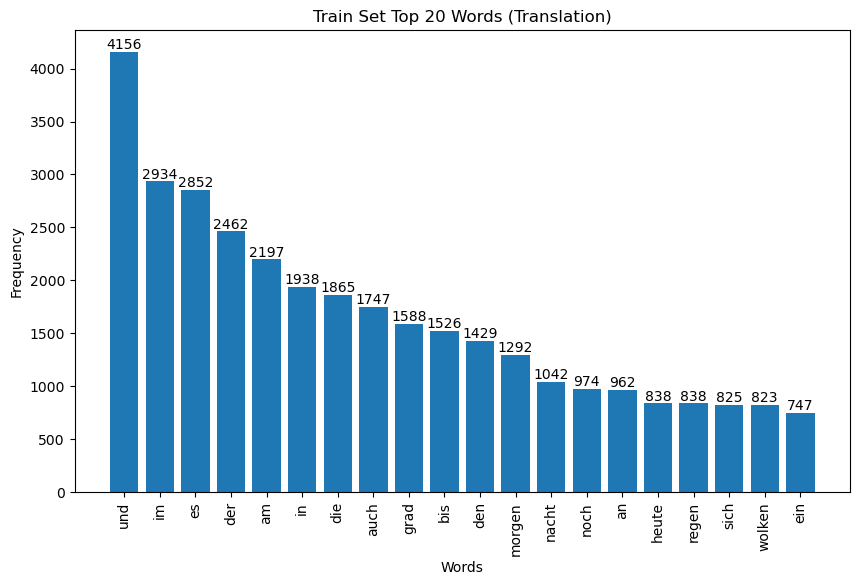

In [18]:
# train set
train_translation = train_corpus.translation.tolist()
train_translation_word_counts = Counter(sum([a.split() for a in train_translation], []))
print(train_translation_word_counts)
plot_word_frequencies(train_translation_word_counts, "Train Set Top 20 Words (Translation)")
generate_word_cloud(train_translation_word_counts, "Train Set Word Cloud (Translation)")

Counter({'.': 7096, 'und': 4156, 'im': 2934, 'es': 2852, 'der': 2462, 'am': 2197, 'in': 1938, 'die': 1865, 'auch': 1747, 'grad': 1588, 'bis': 1526, 'den': 1429, 'morgen': 1292, 'nacht': 1042, 'noch': 974, 'an': 962, 'heute': 838, 'regen': 838, 'sich': 825, 'wolken': 823, 'ein': 747, 'süden': 742, 'sonne': 740, 'norden': 737, 'ist': 722, 'wird': 709, 'für': 661, 'das': 649, 'schauer': 606, 'mit': 604, 'von': 582, 'westen': 579, 'aber': 579, 'dann': 573, 'sonst': 546, 'tag': 498, 'wind': 489, 'da': 484, 'osten': 483, 'wieder': 474, 'auf': 465, 'mal': 461, 'über': 460, 'teilweise': 454, 'gewitter': 453, 'aus': 439, 'vor': 436, 'zum': 416, 'oder': 403, 'nur': 395, 'wettervorhersage': 390, 'nun': 387, 'schnee': 385, 'etwas': 385, 'hier': 370, 'meist': 367, 'wetter': 361, 'abend': 359, 'regnet': 352, 'gibt': 348, 'nordwesten': 343, 'uns': 334, 'bleibt': 331, 'allem': 315, 'nach': 311, 'minus': 306, 'zu': 301, 'bei': 296, 'freitag': 287, 'sind': 286, 'teil': 282, 'richtung': 279, 'weht': 269,

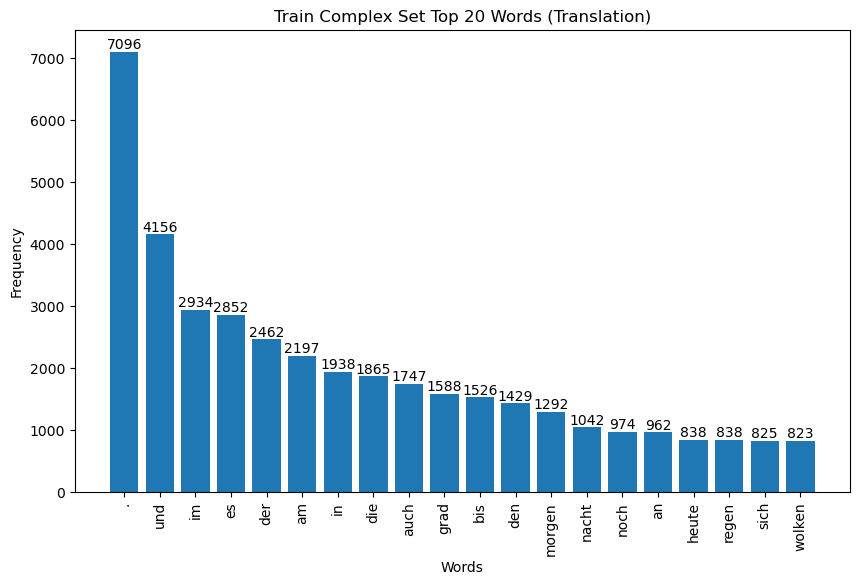

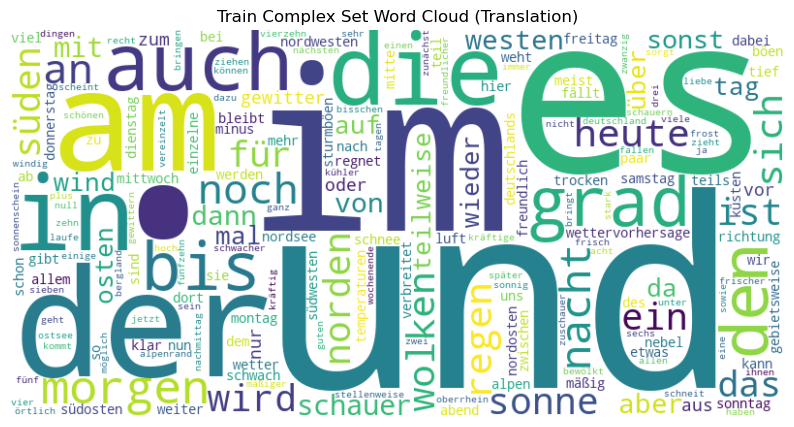

In [19]:
# train_complex set
train_complex_translation = train_complex_corpus.translation.tolist()
train_complex_translation_word_counts = Counter(sum([a.split() for a in train_complex_translation], []))
print(train_complex_translation_word_counts)
plot_word_frequencies(train_complex_translation_word_counts, "Train Complex Set Top 20 Words (Translation)")
generate_word_cloud(train_complex_translation_word_counts, "Train Complex Set Word Cloud (Translation)")

Counter({'und': 291, 'im': 214, 'es': 193, 'der': 163, 'am': 144, 'in': 134, 'grad': 132, 'die': 130, 'auch': 122, 'morgen': 111, 'den': 110, 'bis': 106, 'an': 78, 'nacht': 71, 'sich': 61, 'regen': 61, 'noch': 58, 'norden': 56, 'für': 54, 'wolken': 52, 'heute': 50, 'süden': 49, 'sonne': 49, 'das': 46, 'wird': 45, 'tag': 44, 'von': 44, 'westen': 43, 'schauer': 40, 'ein': 40, 'mit': 39, 'ist': 38, 'nun': 36, 'wettervorhersage': 36, 'aber': 36, 'dann': 36, 'aus': 35, 'teilweise': 33, 'über': 32, 'wieder': 31, 'bleibt': 31, 'sonst': 31, 'gewitter': 30, 'da': 30, 'wind': 29, 'abend': 29, 'etwas': 29, 'osten': 29, 'wetter': 28, 'bei': 28, 'oder': 28, 'hier': 27, 'minus': 27, 'werden': 26, 'auf': 26, 'schnee': 26, 'gibt': 26, 'mal': 25, 'vor': 24, 'richtung': 23, 'nordosten': 22, 'südosten': 22, 'sonntag': 22, 'meist': 21, 'dem': 21, 'weht': 20, 'nur': 20, 'kann': 20, 'küsten': 20, 'dort': 20, 'zum': 19, 'freitag': 19, 'uns': 19, 'nordwesten': 19, 'mittwoch': 18, 'freundlich': 18, 'temperatur

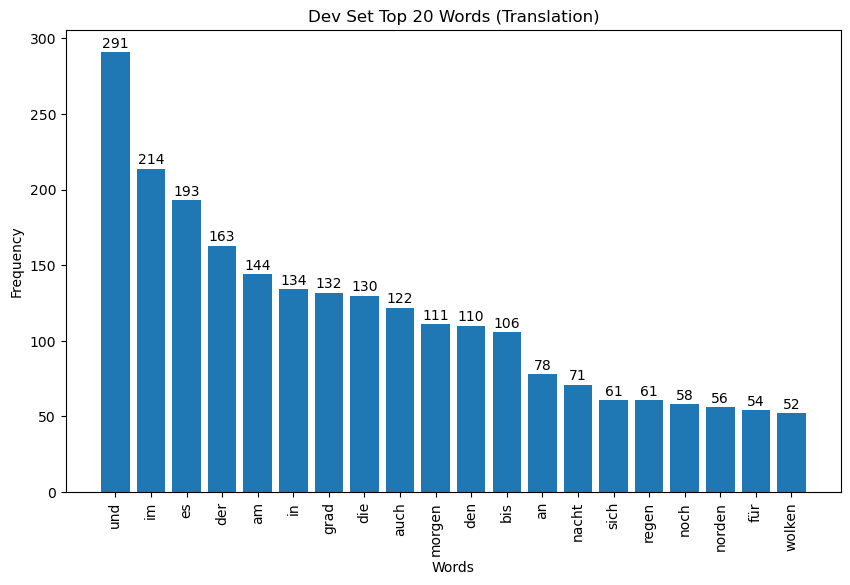

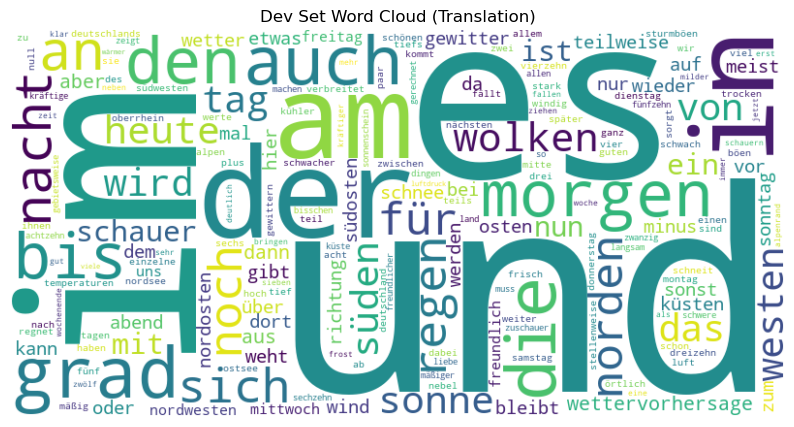

In [20]:
# dev set
dev_translation = dev_corpus.translation.tolist()
dev_translation_word_counts = Counter(sum([a.split() for a in dev_translation], []))
print(dev_translation_word_counts)
plot_word_frequencies(dev_translation_word_counts, "Dev Set Top 20 Words (Translation)")
generate_word_cloud(dev_translation_word_counts, "Dev Set Word Cloud (Translation)")

Counter({'und': 304, 'es': 230, 'im': 222, 'der': 217, 'in': 173, 'die': 167, 'am': 164, 'morgen': 128, 'auch': 127, 'den': 118, 'bis': 114, 'grad': 113, 'an': 86, 'nacht': 79, 'noch': 78, 'ist': 71, 'sich': 70, 'wolken': 68, 'für': 67, 'regen': 59, 'norden': 57, 'heute': 55, 'ein': 54, 'süden': 54, 'sonne': 52, 'gewitter': 49, 'schauer': 48, 'aus': 48, 'wird': 48, 'das': 47, 'mit': 46, 'oder': 46, 'nun': 45, 'wettervorhersage': 45, 'sonst': 43, 'meist': 43, 'wind': 42, 'von': 41, 'dann': 40, 'aber': 40, 'teilweise': 40, 'osten': 38, 'uns': 37, 'nur': 37, 'westen': 36, 'wetter': 35, 'tag': 35, 'etwas': 32, 'gibt': 32, 'nordwesten': 31, 'bleibt': 31, 'da': 30, 'zu': 30, 'freundlich': 30, 'vor': 30, 'samstag': 29, 'abend': 29, 'über': 29, 'donnerstag': 28, 'auf': 28, 'wieder': 28, 'richtung': 28, 'schnee': 27, 'mal': 27, 'zum': 26, 'hier': 25, 'sonntag': 25, 'allem': 25, 'nach': 24, 'freitag': 24, 'temperaturen': 24, 'einzelne': 24, 'nordsee': 24, 'regnet': 24, 'sind': 23, 'dort': 22, 'd

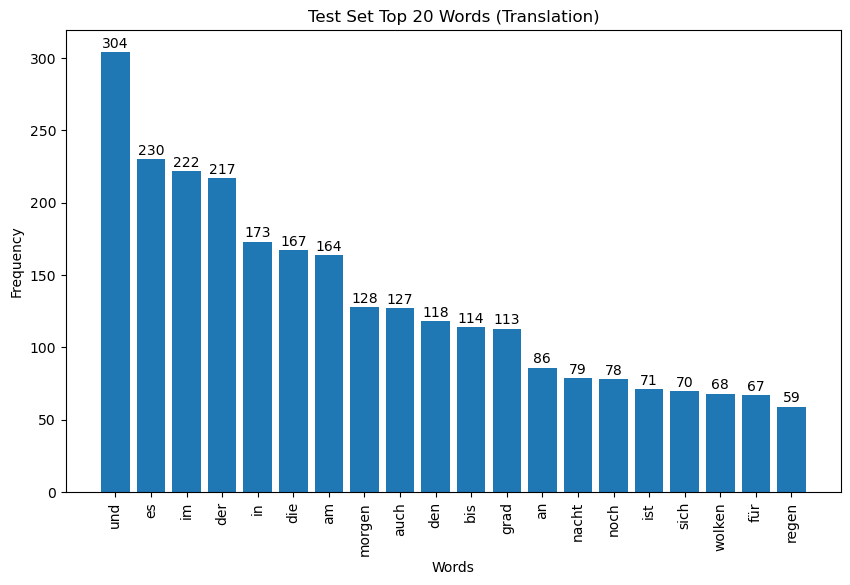

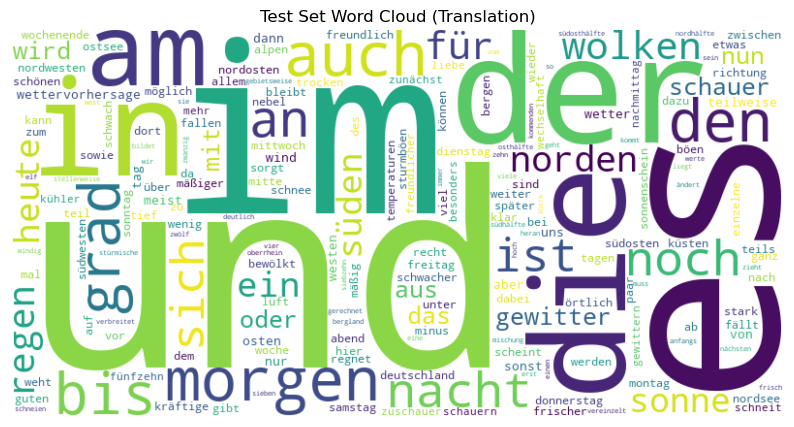

In [21]:
# test set
test_translation = test_corpus.translation.tolist()
test_translation_word_counts = Counter(sum([a.split() for a in test_translation], []))
print(test_translation_word_counts)
plot_word_frequencies(test_translation_word_counts, "Test Set Top 20 Words (Translation)")
generate_word_cloud(test_translation_word_counts, "Test Set Word Cloud (Translation)")

Counter({'und': 4751, 'im': 3370, 'es': 3275, 'der': 2842, 'am': 2505, 'in': 2245, 'die': 2162, 'auch': 1996, 'grad': 1833, 'bis': 1746, 'den': 1657, 'morgen': 1531, 'nacht': 1192, 'an': 1126, 'noch': 1110, 'regen': 958, 'sich': 956, 'heute': 943, 'wolken': 943, 'norden': 850, 'süden': 845, 'sonne': 841, 'ein': 841, 'ist': 831, 'wird': 802, 'für': 782, 'das': 742, 'schauer': 694, 'mit': 689, 'von': 667, 'westen': 658, 'aber': 655, 'dann': 649, 'sonst': 620, 'tag': 577, 'wind': 560, 'osten': 550, 'da': 544, 'wieder': 533, 'gewitter': 532, 'teilweise': 527, 'aus': 522, 'über': 521, 'auf': 519, 'mal': 513, 'vor': 490, 'oder': 477, 'wettervorhersage': 471, 'nun': 468, 'zum': 461, 'nur': 452, 'etwas': 446, 'schnee': 438, 'meist': 431, 'wetter': 424, 'hier': 422, 'abend': 417, 'gibt': 406, 'nordwesten': 393, 'bleibt': 393, 'uns': 390, 'regnet': 387, 'allem': 356, 'nach': 351, 'minus': 348, 'zu': 348, 'bei': 346, 'freitag': 330, 'richtung': 330, 'sind': 324, 'teil': 319, 'freundlich': 313, 'w

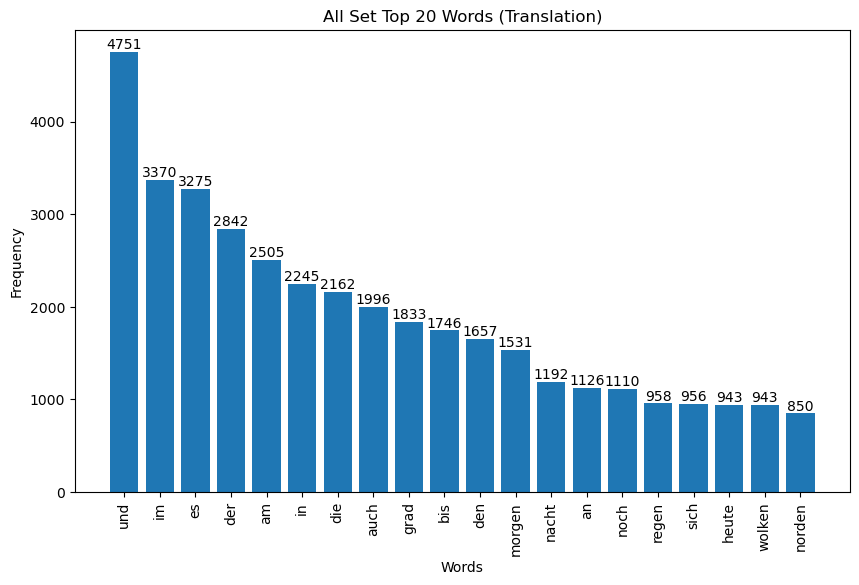

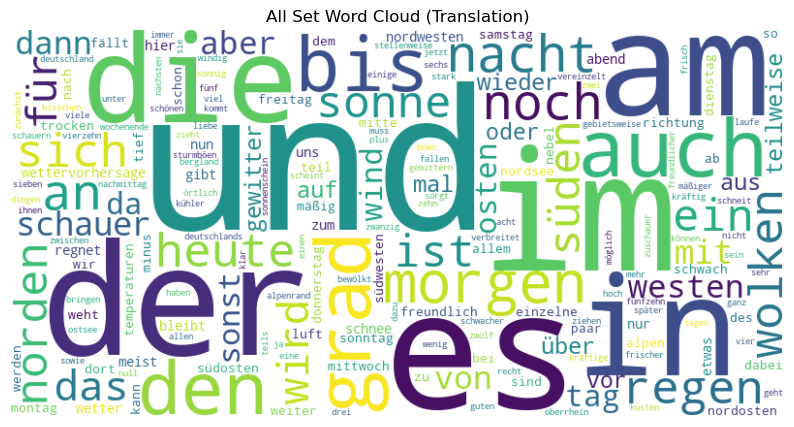

In [22]:
# all set
all_translation = all_corpus.translation.tolist()
all_translation_word_counts = Counter(sum([a.split() for a in all_translation], []))
print(all_translation_word_counts)
plot_word_frequencies(all_translation_word_counts, "All Set Top 20 Words (Translation)")
generate_word_cloud(all_translation_word_counts, "All Set Word Cloud (Translation)")

## For Singers

In [23]:
def plot_signer_distribution(signer_counts):
    """
    绘制不同 signer 的数量分布直方图，并按数量排序。
    
    参数:
    signer_counts (Counter): 包含每个 signer 数量的 Counter 对象。
    """
    # 将 Counter 转换为列表并排序
    sorted_signer_counts = sorted(signer_counts.items(), key=lambda x: x[1], reverse=True)

    # 提取标签和数量
    labels, values = zip(*sorted_signer_counts)

    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')

    # 添加标题和标签
    plt.title('Distribution of Signers in Train Corpus')
    plt.xlabel('Signers')
    plt.ylabel('Count')

    # 显示数值
    for i, v in enumerate(values):
        plt.text(i, v + 1, str(v), ha='center', va='bottom')

    # 显示图形
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Counter({'Signer01': 1862, 'Signer05': 1629, 'Signer04': 1056, 'Signer08': 848, 'Signer07': 768, 'Signer03': 582, 'Signer09': 233, 'Signer02': 83, 'Signer06': 35})


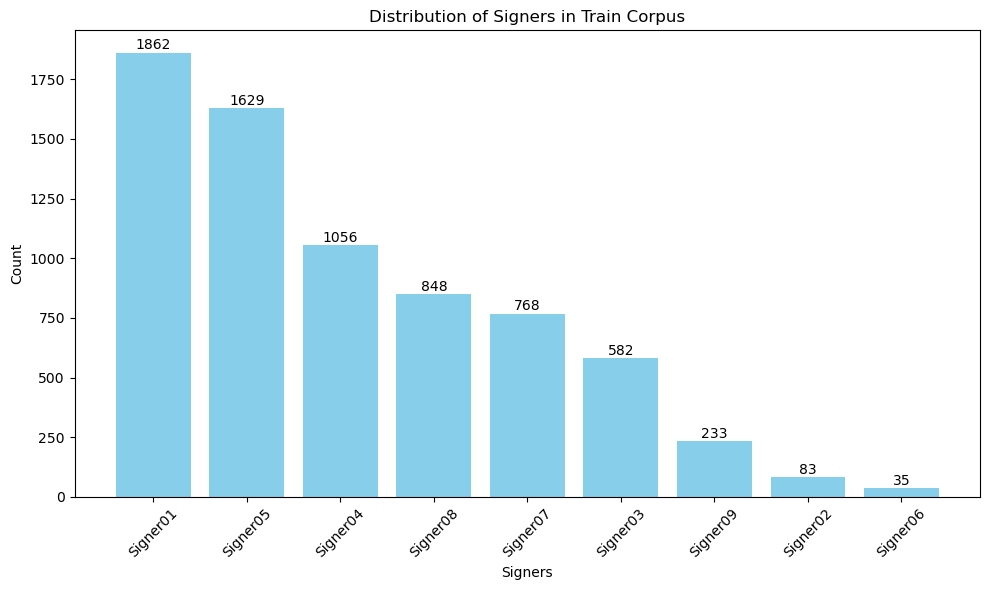

In [24]:
# train set
counts = Counter(train_corpus.speaker.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 1862, 'Signer05': 1629, 'Signer04': 1056, 'Signer08': 848, 'Signer07': 768, 'Signer03': 582, 'Signer09': 233, 'Signer02': 83, 'Signer06': 35})


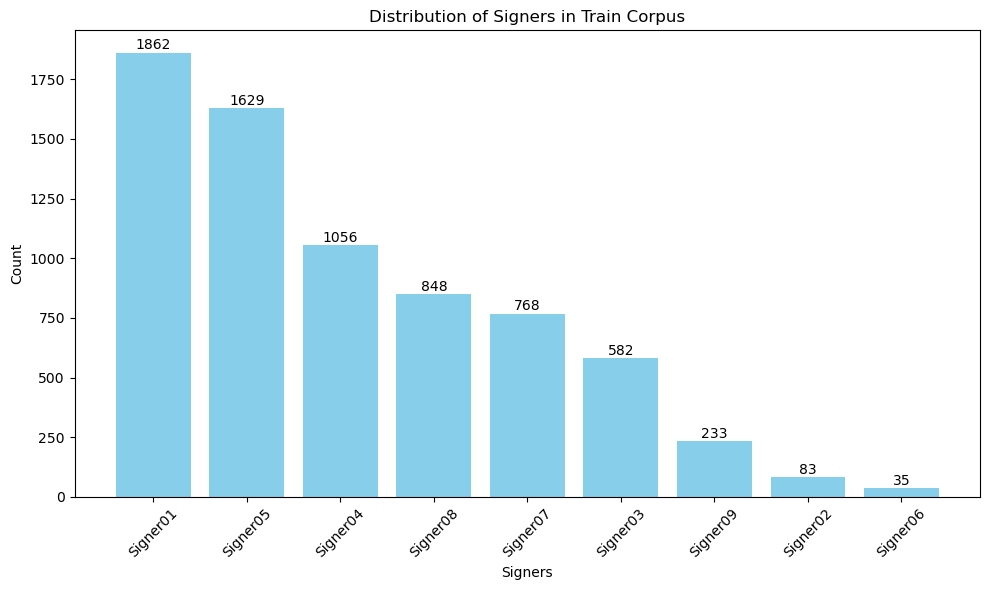

In [25]:
# train complex set
counts = Counter(train_complex_corpus.speaker.tolist())
print(counts)
plot_signer_distribution(counts)

In [26]:
# dev set
counts = Counter(dev_corpus.speaker.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 138, 'Signer05': 108, 'Signer04': 74, 'Signer08': 60, 'Signer07': 58, 'Signer03': 48, 'Signer09': 17, 'Signer06': 10, 'Signer02': 6})


Counter({'Signer05': 196, 'Signer01': 191, 'Signer04': 77, 'Signer08': 58, 'Signer03': 53, 'Signer07': 40, 'Signer09': 19, 'Signer02': 6, 'Signer06': 2})


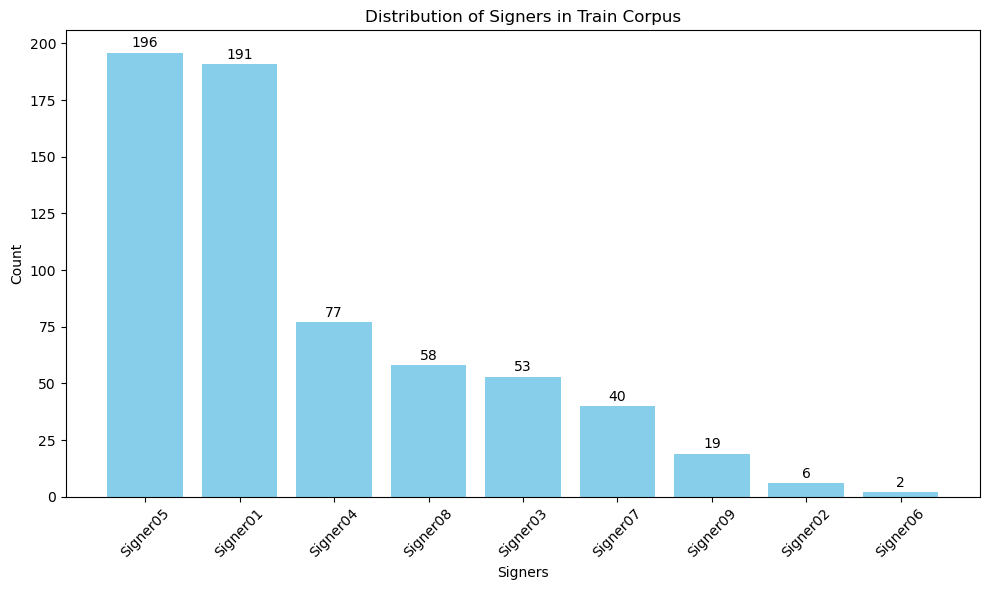

In [27]:
# test set
counts = Counter(test_corpus.speaker.tolist())
print(counts)
plot_signer_distribution(counts)

Counter({'Signer01': 2191, 'Signer05': 1933, 'Signer04': 1207, 'Signer08': 966, 'Signer07': 866, 'Signer03': 683, 'Signer09': 269, 'Signer02': 95, 'Signer06': 47})


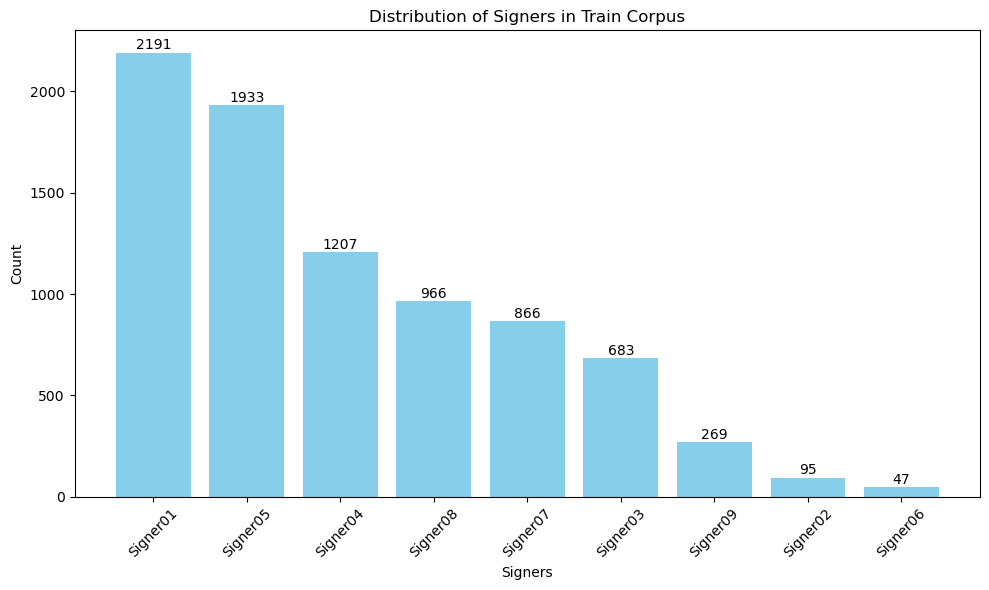

In [28]:
# all set
counts = Counter(all_corpus.speaker.tolist())
print(counts)
plot_signer_distribution(counts)

# For Frames and Orth and Translation Length

In [29]:
def get_length_counts(corpus, mode):
    length_counts = dict()
    for idx, row in corpus.iterrows():
        length_counts[idx] = (len(glob.glob(os.path.join(features_dir, mode, row.name, '*.png'))),
                              len([word for word in row.orth.split(' ') if word]),
                              len([word for word in row.translation.split(' ') if word]))
    return length_counts


def plot_frames_length_and_annotation_length_distribution(length_counts):
    frames_lengths, orth_lengths,translation_lengths = zip(*length_counts.values())
    plt.figure(figsize=(10, 6))
    plt.hist(frames_lengths, bins=50, alpha=0.5, label='Frames Length')
    plt.hist(orth_lengths, bins=50, alpha=0.5, label='Orth Length')
    plt.hist(translation_lengths, bins=50, alpha=0.5, label='Translation Length')
    plt.legend(loc='upper right')
    plt.title('Distribution of Frames Length and Orth Length and Translation Length')
    plt.xlabel('Length')
    plt.ylabel('Count')
    plt.show()
    print(
        f"Frames Length:\n"
        f"\tmean_std: {np.mean(frames_lengths):.2f} +/- {np.std(frames_lengths):.2f}\n"
        f"\tmin_max: {np.min(frames_lengths)} ~ {np.max(frames_lengths)}\n"
        f"\t5%_percentile: {np.percentile(frames_lengths, 5)} ~ {np.percentile(frames_lengths, 95)}"
    )
    print(
        f"Orth Length:\n"
        f"\tmean_std: {np.mean(orth_lengths):.2f} +/- {np.std(orth_lengths):.2f}\n"
        f"\tmin_max: {np.min(orth_lengths)} ~ {np.max(orth_lengths)}\n"
        f"\t5%_percentile: {np.percentile(orth_lengths, 5)} ~ {np.percentile(orth_lengths, 95)}"
    )
    print(
        f"Translation Length:\n"
        f"\tmean_std: {np.mean(translation_lengths):.2f} +/- {np.std(translation_lengths):.2f}\n"
        f"\tmin_max: {np.min(translation_lengths)} ~ {np.max(translation_lengths)}\n"
        f"\t5%_percentile: {np.percentile(translation_lengths, 5)} ~ {np.percentile(translation_lengths, 95)}"
    )


In [30]:
# train set
train_length_counts = get_length_counts(train_corpus, 'train')
plot_frames_length_and_annotation_length_distribution(train_length_counts)

Frames Length:
	mean_std: 116.59 +/- 49.86
	min_max: 16 ~ 475
	5%_percentile: 43.0 ~ 208.0
Orth Length:
	mean_std: 7.79 +/- 3.44
	min_max: 1 ~ 30
	5%_percentile: 3.0 ~ 14.0
Translation Length:
	mean_std: 13.96 +/- 5.98
	min_max: 1 ~ 52
	5%_percentile: 6.0 ~ 25.0


In [31]:
# train complex set
train_complex_length_counts = get_length_counts(train_complex_corpus, 'train')
plot_frames_length_and_annotation_length_distribution(train_complex_length_counts)

Frames Length:
	mean_std: 116.59 +/- 49.86
	min_max: 16 ~ 475
	5%_percentile: 43.0 ~ 208.0
Orth Length:
	mean_std: 9.55 +/- 4.10
	min_max: 1 ~ 34
	5%_percentile: 4.0 ~ 17.0
Translation Length:
	mean_std: 14.96 +/- 5.98
	min_max: 2 ~ 53
	5%_percentile: 7.0 ~ 26.0


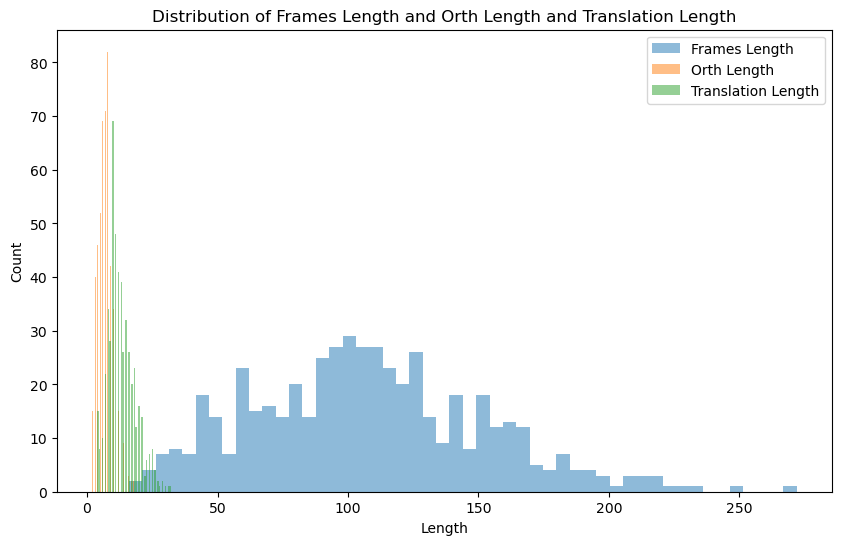

Frames Length:
	mean_std: 107.47 +/- 44.38
	min_max: 16 ~ 272
	5%_percentile: 40.0 ~ 184.09999999999997
Orth Length:
	mean_std: 7.22 +/- 3.02
	min_max: 2 ~ 18
	5%_percentile: 3.0 ~ 13.0
Translation Length:
	mean_std: 13.14 +/- 5.22
	min_max: 4 ~ 32
	5%_percentile: 6.0 ~ 24.0


In [32]:
# dev set
dev_length_counts = get_length_counts(dev_corpus, 'dev')
plot_frames_length_and_annotation_length_distribution(dev_length_counts)

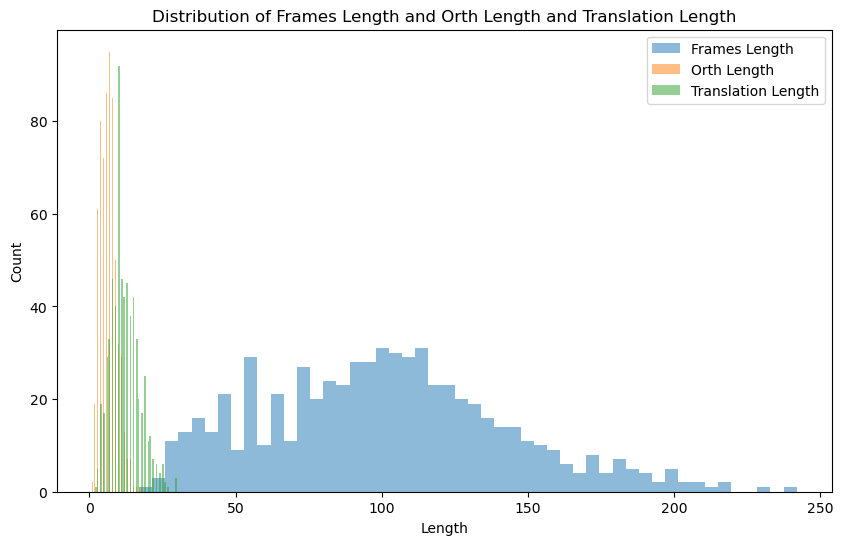

Frames Length:
	mean_std: 100.67 +/- 41.70
	min_max: 17 ~ 242
	5%_percentile: 36.0 ~ 177.94999999999993
Orth Length:
	mean_std: 6.64 +/- 2.75
	min_max: 1 ~ 18
	5%_percentile: 3.0 ~ 11.0
Translation Length:
	mean_std: 12.17 +/- 4.93
	min_max: 2 ~ 30
	5%_percentile: 5.0 ~ 21.0


In [33]:
# test set
test_length_counts = get_length_counts(test_corpus, 'test')
plot_frames_length_and_annotation_length_distribution(test_length_counts)

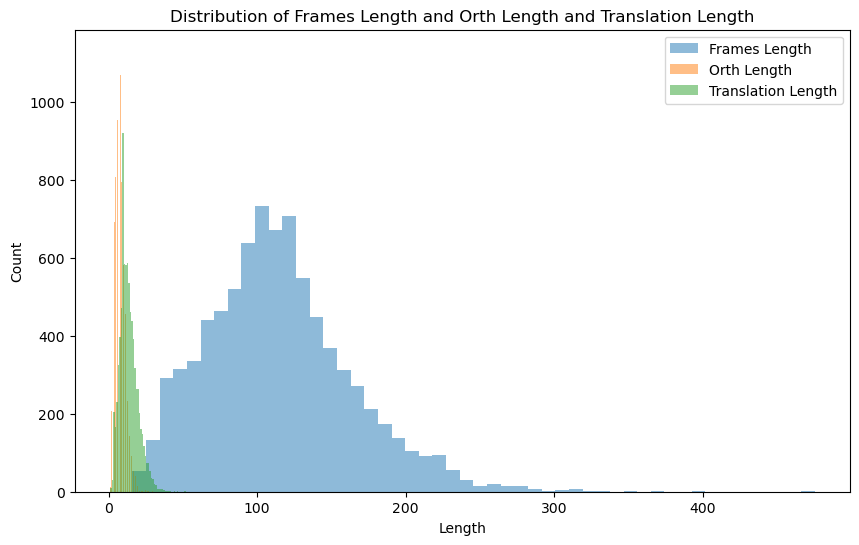

Frames Length:
	mean_std: 114.78 +/- 49.16
	min_max: 16 ~ 475
	5%_percentile: 42.0 ~ 205.0
Orth Length:
	mean_std: 7.66 +/- 3.38
	min_max: 1 ~ 30
	5%_percentile: 3.0 ~ 14.0
Translation Length:
	mean_std: 13.77 +/- 5.88
	min_max: 1 ~ 52
	5%_percentile: 6.0 ~ 25.0


In [34]:
# all set
all_length_counts = {**train_length_counts, **dev_length_counts, **test_length_counts}
plot_frames_length_and_annotation_length_distribution(all_length_counts)